# Investigating the Determinants of University Rankings: An Analysis of Overall Scores in Relation to Research, Total Students, and Internationalization

## Introduction

Understanding the global reputation of academic institutions is increasingly critical in today’s interconnected world. University rankings have become a significant reference point, shaping decisions about where students choose to study, where faculty seek employment, and how funding is allocated. Leading rankings such as the Times Higher Education and QS World University Rankings compile their overall scores from nuanced mixes of criteria. For universities that want to improve their standing, discovering what metrics have the most impact on this scoring is paramount.

Each of our group members focused on different research questions that included inference-based responses. These questions included the following:

- How does the overall university score change with the university rank, its location, and the international student percentage?
- How does the overall university score change with teaching quality(Teaching Score), research contribution (Research Score) and citation presence(Citation Score)?
- How is the overall score associated with the research score, the number of students per staff, and the percentage of international students?
- How do a university’s Teaching Score and geographic region influence the number of international students it attracts?

This project investigates the relationship between a university’s overall score and three key factors: its research score, the student-to-staff ratio, and the proportion of international students. Our question: `How is the overall score associated with the research score, the number of students per staff, and the percentage of international students?` These metrics collectively represent core aspects of institutional excellence, capturing research contributions, operational efficiency, and global reach. As a group, we finalized this question because the output obtained with this analysis provides the best results, indicating significant relationships of the input variables with the response, and the variables in the question also cover a wide range of factors that are vital in modern-day rankings, so we aim to provide readers with an up-to-date summary. 

We utilized the World University Rankings 2023 dataset from [Kaggle](https://www.kaggle.com/datasets/alitaqi000/world-university-rankings-2023), which includes detailed data on 1799 universities worldwide, covering metrics such as teaching, research, and international outlook. From this data, we try to find patterns that explain what drives a university’s overall score and what these insights say about global higher education.

Previous research lays a solid foundation for our analysis. For example, Docampo and Cram (2014) reported that research output and student-to-staff ratios are crucial for university rankings. Meanwhile, Hazelkorn (2015) found that the increasing focus on internationalization reflects its importance for enhancing institutional reputation. Such studies confirm the relevance of considering these factors in understanding how universities position themselves in rankings.

The significance of these metrics has only increased in the post-pandemic era. According to Marginson (2007), higher education is no longer a national competition; it has become a global race where excellence in research and internationalization are crucial for survival. The post-pandemic situation, which disrupted the traditional teaching model and changed student expectations, has brought to the forefront the pressing need for universities to adapt themselves and prioritize these dimensions.

Through this analysis, we aim to explore how recent developments in the education sector influence rankings. Are universities maintaining their standing amidst budget cuts, increased demand for online learning, and evolving student preferences? By answering these questions, we hope to provide valuable insights for institutions to refine their strategies and bolster their global competitiveness.


**Data Description**


- `University Rank` is a categorical variable includes rankings from 1 to more than 1501.
- `Name of University` is a categorical variable that contains the names of each university.
- `Location` is a categorical variable that includes the country where the corresponding university is located at.
- `No. of student` is a continuous variable that records the number of student attending the university.
- `No. of student per staff` is a continuous variable that includes the number of students under one professor at university.
- `International Student` is a continuous variable that includes the percentage of interantional student enrolled in the university.
- `Female:Male Ratio` is a continuous variable that includes the ratio of female and male students enrolled in the university.
- `OverAll Score` is a continuous variable that contains the overall score out of 100.
- `Teaching Score` is a continuous variable that contains the teaching score out of 100.
- `Research Score` is a continuous variable that contains the research score out of 100.
- `Citations Score` is a continuous variable that contains the citations score out of 100.
- `Industry Income Score` is a continuous variable that contains the industry income score out of 100.
- `International Outlook Score` is a continuous variable that contains the international outlook score out of 100.

The inference question takes continuous response and predictors, and it is analyzed at a  5% significance level.

## Methods and results
**Exploratory Data Analysis**

We refer to the dataset as `uni_data`.


In [34]:
library(tidyverse)
library(dplyr)
library(GGally)
library(car)
library(broom)

In [36]:
# Main developer: Jenni
# Contributor: Zhanerke
uni_data <- read_csv("university.csv")
head(uni_data)

Rows: 2341 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): University Rank, Name of University, Location, International Stude...
dbl  (1): No of student per staff
num  (1): No of student

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,University of Oxford,United Kingdom,20965,10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


*Table 1 : An overview of the raw data*

**Data Preprocessing**

Firstly, we need to give the dataset some easy-to-access column names, that is, replace the space between the words of a column name by underscore.

Secondly, we filter out the null values. 


Thirdly, since we need to use research score, number of students per staff, percentage of international student and overall score as continuous variables, we change the variable type in the preprocessing stage.

Finally, since the data is very large and the processing time is too long to run for the entire dataset, we extract the universities with ranking smaller than 200.

In [39]:
# Main developer: Jenni
# Contributor: Ruhani
colnames(uni_data) <- c('University_Rank',
                        'Name_of_University',
                        'Location',
                        'No_of_student',
                        'No_of_student_per_staff',
                        'International_Student',
                        'Female_Male_Ratio',
                        'OverAll_Score',
                        'Teaching_Score',
                        'Research_Score',
                        'Citations_Score',
                        'Industry_Income_Score',
                        'International_Outlook_Score')

In [40]:
# Main developer: Jenni
# Contributor: Adwait
uni_data <- uni_data %>% 
        filter(!is.na(University_Rank)) %>% 
        mutate(Research_Score = as.numeric(Research_Score),
               OverAll_Score = as.numeric(OverAll_Score),
               University_Rank = as.numeric(University_Rank),
               International_Student = as.numeric(gsub("%", "", International_Student))) %>% 
        filter(University_Rank < 199)
head(uni_data)
nrow(uni_data)

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `Research_Score = as.numeric(Research_Score)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


University_Rank,Name_of_University,Location,No_of_student,No_of_student_per_staff,International_Student,Female_Male_Ratio,OverAll_Score,Teaching_Score,Research_Score,Citations_Score,Industry_Income_Score,International_Outlook_Score
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,University of Oxford,United Kingdom,20965,10.6,42,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
2,Harvard University,United States,21887,9.6,25,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
3,University of Cambridge,United Kingdom,20185,11.3,39,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,Stanford University,United States,16164,7.1,24,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
5,Massachusetts Institute of Technology,United States,11415,8.2,33,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
6,California Institute of Technology,United States,2237,6.2,34,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6


[1] 199

*Table 2: An overview of the clean data*

**Visualization of the Variables Using Histograms**

From the histograms, we can have better idea of how each input variable is distributed.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


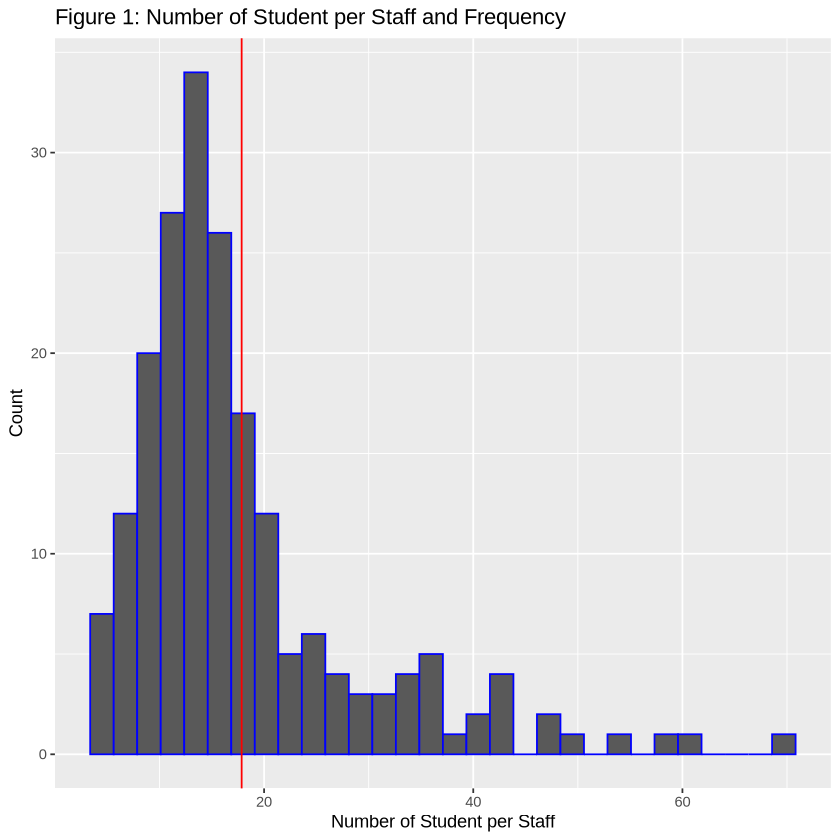

In [41]:
# Main developer: Jenni
# Contributor: Zhanerke
ggplot(uni_data, aes(No_of_student_per_staff)) + 
geom_histogram(col = "blue") +
ggtitle("Figure 1: Number of Student per Staff and Frequency") + 
labs(x = "Number of Student per Staff",y = "Count") +
geom_vline(xintercept = mean(uni_data$No_of_student_per_staff), color = "red")

*Figure 1: Number of Student per Staff and Frequency*

Above is the histogram that illustrates the frequency distribution of the explanatory variable, `number of student per staff`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


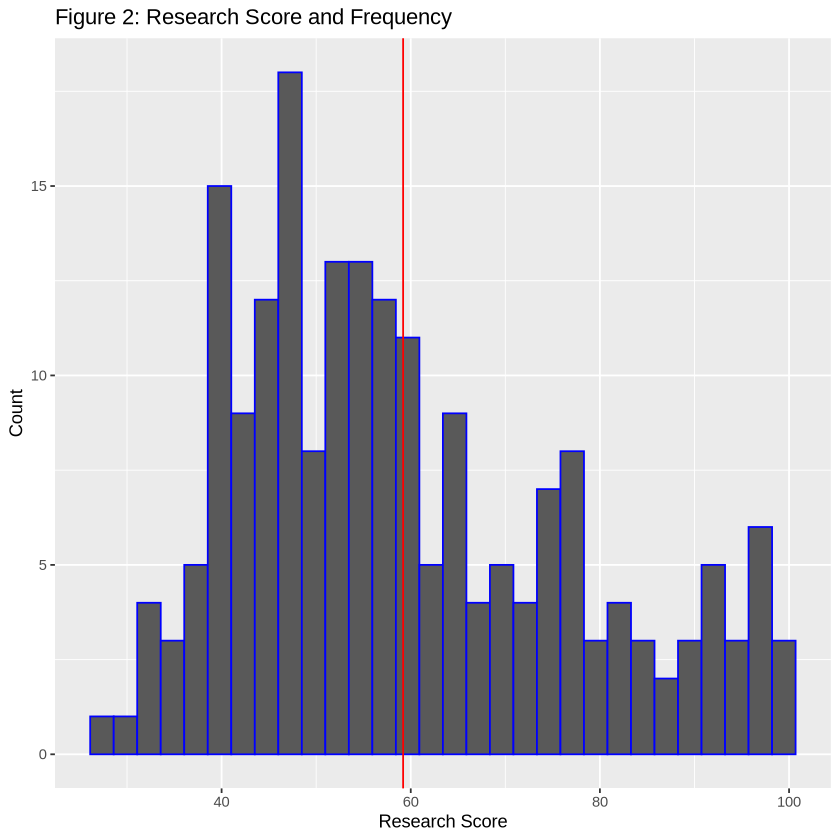

In [42]:
# Main developer: Jenni
# Contributor: Ruhani
ggplot(uni_data, aes(Research_Score)) + 
geom_histogram(col = "blue") +
ggtitle("Figure 2: Research Score and Frequency") + 
labs(x = "Research Score",y = "Count") +
geom_vline(xintercept = mean(uni_data$Research_Score), color = "red")

*Figure 2: Research Score and Frequency*

Above is the histogram that illustrates the frequency distribution of the explanatory variable, `research score`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


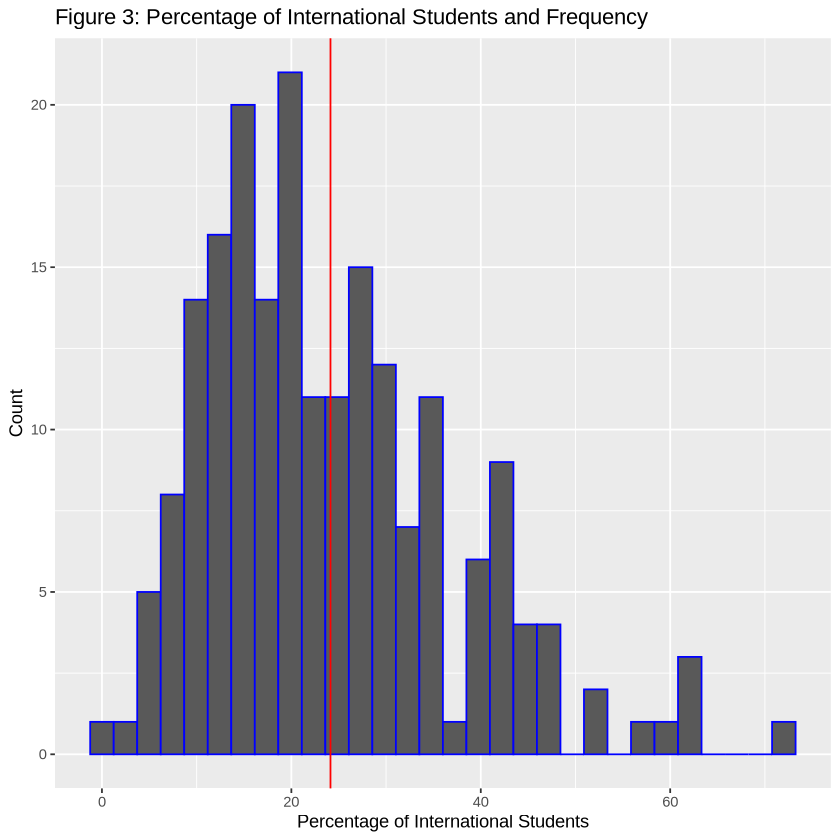

In [43]:
# Main developer: Jenni
# Contributor: Adwait
ggplot(uni_data, aes(International_Student)) + 
geom_histogram(col = "blue") +
ggtitle("Figure 3: Percentage of International Students and Frequency") + 
labs(x = "Percentage of International Students", y = "Count") +
geom_vline(xintercept = mean(uni_data$International_Student), color = "red")

*Figure 3: Percentage of International Students and Frequency*

Above is the histogram that illustrates the frequency distribution of the explanatory variable, `percentage of international students` in a university.

These three histograms gives us a general idea of how the variables are distributed. All plots are roughly right skewed. We can tell from the graphs that the `number of student per staff` ranges roughly from around 4 to 69, the `research score` ranges from around 28 to 100, and the `percentage of international students` ranges from around 1% to 73%.

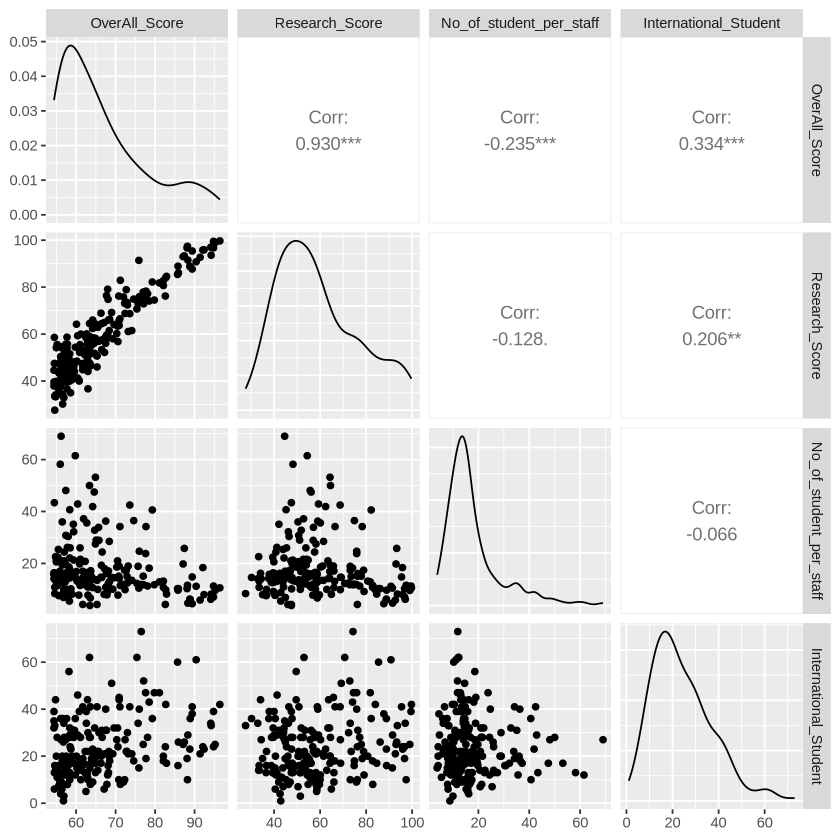

In [46]:
# Main developer: Jenni
# Contributor: Zhanerke
uni_data %>% 
    select(OverAll_Score, Research_Score, No_of_student_per_staff, International_Student) %>% 
    ggpairs()

*Figure 4: The correlation matrix of the predictors and response variable*

**Interpretation of the correlation matrix:** There is a relatively high correlation between the response, `overall score` and each of the predictors, `research score` (0.930), `number of student per staff` (-0.235), and `international student` (0.334). The correlation between the predictors are relatively lower, all of which are lower than 0.210 in absolute value. Thus, we can conclude at this stage, our predictors are correlated with the response variable, and multicollinearity is unlikely to occur.

**Methods: Plan**

We are planning to use an additive multiple linear regression model, as there are three input variables, and the response variable is continuous, which means that the logistic regression model for a binary output or the Poisson regression model that measures the count per unit of time or space would not apply. The reason for choosing additive MLR over MLR with interactions is that an additive model is less prone to overfitting, and there exists no theoretical reason to believe that the predictors depend on each other. Thus, we would implement an additive MLR model. 
  
There are a few assumptions required for additive MLR. Firstly, there should be a linear relationship between the response and predictors. Secondly, the errors should be independent of each other. Thirdly, the conditional distribution of the error terms should be normal, and we expect to see most of the points lie on the 45-degree dotted line on the Q-Q plot if the errors are normally distributed. Fourth, the variance of the error terms should be equal, and we expect to see a uniform shape of the points on the Residuals vs. Fitted plot, which suggests no heteroscedasticity. Fifth, multicollinearity should not happen, and we expect the variance inflation factors for the model to be smaller than 5.  Lastly, we expect all the confounding variables to be included in the model if they exist, to produce unbiased and meaningful results.

In [47]:
# Main developer: Jenni
# Contributor: Ruhani
MLR <- lm(OverAll_Score ~ Research_Score + No_of_student_per_staff + International_Student, data = uni_data)
tidy(MLR) 

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),32.8618018,1.06821903,30.763168,9.457954e-77
Research_Score,0.5533599,0.01465122,37.768867,1.246496e-91
No_of_student_per_staff,-0.1111355,0.02271797,-4.891966,2.084361e-06
International_Student,0.1232047,0.01981363,6.218180,2.998225e-09


*Table 3: Output of the additive multiple linear regression model*

The null hypothesis assumes no association between the predictors and the response variable. However, since all p-values (1.246496e-91 for `Research Score`, 2.084361e-06 for `No of student per staff` and 2.998225e-09 for `International Student`) are smaller than the 5% significance level, we reject the null hypothesis and conclude that all predictors are significantly associated with the response variable. In other words, we conlcude that holding the other two input variables constant, one unit increase in `Research Score` associates with 0.5534 unit increase in `OverAll Score`, while one unit increase in `No of student per staff` associates with 0.1111 unit decrease in `OverAll Score`, and a 1% increase in `International Student` associates with 0.1232 unit increase in `OverAll Score`. In conclusion, we could answer our inference question that all predictors are associated with the response, and more specifically, the overall score is positively associated with the research score and the percentage of international students, and negatively associated with the number of student per staff. 

**Assumptions:** We checked if our additive MLR model meets the assumptions

In [49]:
# Main developer: Jenni
# Contributor: Adwait
summary(MLR)$r.squared

[1] 0.8986869

- An R.squared value of 0.899 indicates that approximately 89.9% of the variability in the `overall score` can be explained by the combined effects of the `research score`, the `number of students per staff`, and the `percentage of international students`. This suggests that the model provides a strong fit, with these predictors accounting for the majority of the variation in the `overall score`.

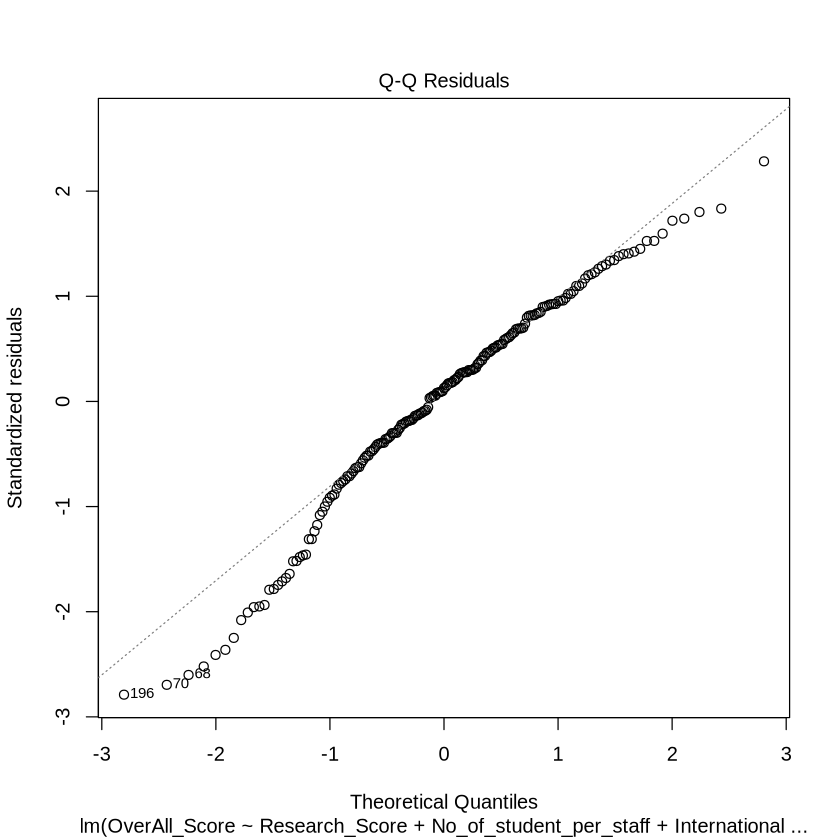

In [50]:
# Main developer: Jenni
# Contributor: Zhanerke
plot(MLR,2) 

*Figure 5: Q-Q Plot*

- This image shows the distribution of the standardized residuals with the theoretical quantiles to check the assumption of the normality of the residuals. The conditional distribution of the error terms is normal, and we see most of the points lie on the 45-degree dotted line on the Q-Q plot. Hence, the assumption regarding the normal distribution of the error terms is roughly met. 
- However, we still see that the residuals deviation  significantly from the 45-degree reference line, particularly in the tails (both at the lower and upper ends), thus demonstrating some violation of the normal distribution of the error.

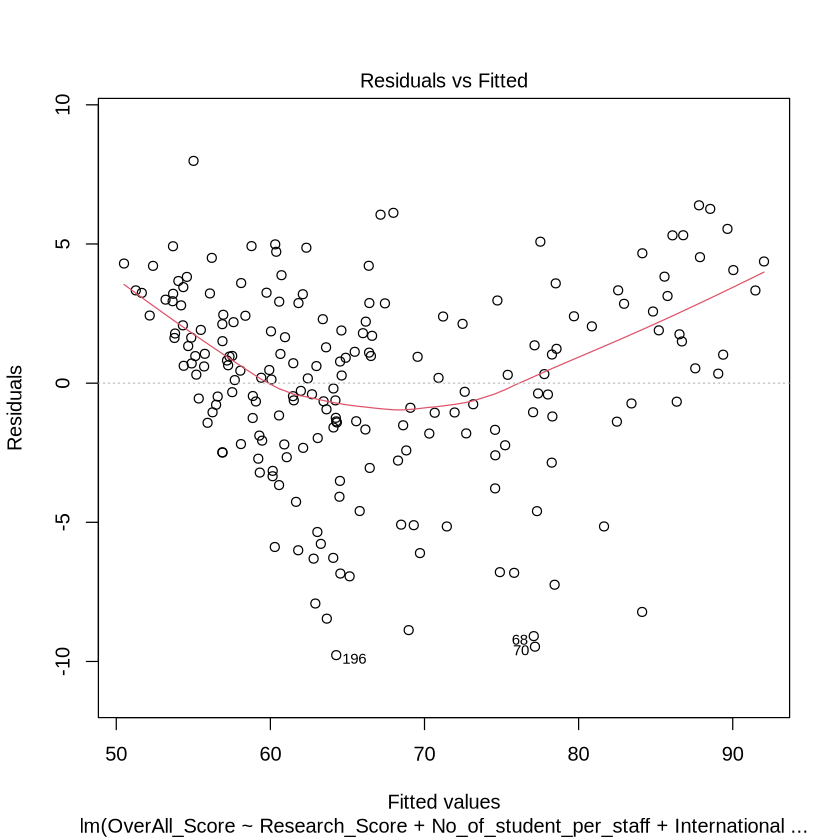

In [51]:
# Main developer: Jenni
# Contributor: Ruhani
plot(MLR,1)

*Figure 6: Residuals vs Fitted Plot*

- The Residual vs fitted model for `lm(OverAll_Score ~ Reasearch_Score + No_of_stduents_per_staff + International_Students, uni_data)` shows uniform and scattered cloud points, which indicates that the residuals have constant variance across fitted values, supporting the assumption for Homoscedasticity. 
- However, the red line still shows a mild quadratic pattern, which could indicate issues with linearity or unaccounted complexity in the relationships, therefore leading to minor violation of constant variance across fitted values, indicating that some complexity in the relationship between the predictors and the response may not be fully captured by the model.

In [52]:
# Main developer: Jenni
# Contributor: Adwait
vif(MLR)

Research_Score No_of_student_per_staff   International_Student 
               1.058612                1.018359                1.045879

- All the explanatory variables have VIF < 5, which indicates that multicollinearity is not a concern in the model. The predictors are not highly correlated with each other, ensuring reliable coefficient estimates and more stable statistical inferences.


In [53]:
# Main developer: Jenni
# Contributor: Zhanerke
glance(MLR)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.8986869,0.8971282,3.531451,576.5754,1.196957e-96,3,-531.4285,1072.857,1089.323,2431.874,195,199


- The p-value (1.196957e-96) of this model is smaller than the 5% significance level, and we conclude that the MLR model is better than the intercept-only model.

## Discussion

**Impact of Findings :** We got an R.squared value of 0.898 which means that 89.9% of the variance in the response variable (overall university scores) was explained successfully by the explanatory variables in our model. Our additive MLR model is close to perfect assumptions for linear models. We get a high degree of reliability from the model, and our findings that the three predictors are associated with the response variable can help future investigations.

**Whether the results matched our preliminary research readings:**
Yes, our result matches with the preliminary research readings, and we observed that there is an association between each predictors and the response variable.

**Potential Weaknesses and Limitations of the Model:**

There are some limitations and weaknesses of the model. In reality, if the three predictors depend on each other, the additive MLR model will not perform as well as an MLR model with interaction terms. Moreover, linear models are very sensitive to outliers and influential data points, so if they exist, the estimated coefficients for the model would be biased. Lastly, we only used part of the entire data (rows with rankings 1-198). If the overall score of universities with larger rankings have different relationships between the three input variables (i.e. non-linear), the model would potentially return a misleading result.

**How our model can be improved:** 
Instead of going with a fixed set of variables upfront, we can use variable selection methods like forward or backward selection with a certain, desired number of variables to get the best possible model. We could also use shrinkage methods like Ridge or LASSO to do the variable selection for us and at the same time, address potential multicollinearity issues.

For the Q-Q Plot, We can apply transformers to predictors (`Research_Score`, `No_of_Students_per_Staff`, `International_Students`) or response variables  (`OverAll_Score`). For example, the transformations could be Log transformation for positively skewed variables, and we might see the points more closely aligned to the 45-degree line. 

For the Residuals vs. Fitted plot, We can further explore interaction models with different interaction terms (e.g. `lm(OverAll_Score ~ Research_Score * No_of_student_per_staff * International_Student, uni_data)`), to see how the input variables can be combined to get better results instead of looking at the individual relationships of the explanatory variables with the response.

**Future questions / research this study can lead to:**
This study can help universities determine if they need to recruit more faculty or fewer students to improve their scores and this can lead to more research into what type of faculty has the most encouraging feedback from the students. Future studies could assess how recent policy changes at the institutional or national level affect ranking outcomes. For example, do universities with strong sustainability programs or collaborative international partnerships achieve higher rankings? 


## References

- Docampo, D., & Cram, L. (2014). On the informativeness of university rankings: The impact of metrics. Higher Education Policy, 27(2), 193–215.
- Hazelkorn, E. (2015). Rankings and the reshaping of higher education: The battle for world-class excellence. Palgrave Macmillan.
- Marginson, S. (2007). Global university rankings: Implications for higher education in Europe. European Journal of Education, 42(2), 209–224.
- World University Rankings 2023. (n.d.). Retrieved from Kaggle.
